In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df=pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\cybersecurity_attacks.csv")
df.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [6]:
df.drop(['Timestamp', 'Payload Data', 'Source Port', 'Destination Port', 'IDS/IPS Alerts', 'Source IP Address','Destination IP Address','User Information', 'Device Information','Geo-location Data', 'Firewall Logs', 'Proxy Information','Log Source'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [8]:
df['Malware Indicators'].fillna('None Detected', inplace=True)
df['Alerts/Warnings'].fillna('No Alert', inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14920\470393586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Malware Indicators'].fillna('None Detected', inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_14920\470393586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment
0,ICMP,503,Data,HTTP,IoC Detected,28.67,No Alert,Malware,Known Pattern B,Logged,Low,Segment A
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,No Alert,Malware,Known Pattern A,Blocked,Low,Segment B
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C
3,UDP,385,Data,HTTP,None Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B
4,TCP,1462,Data,DNS,None Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C


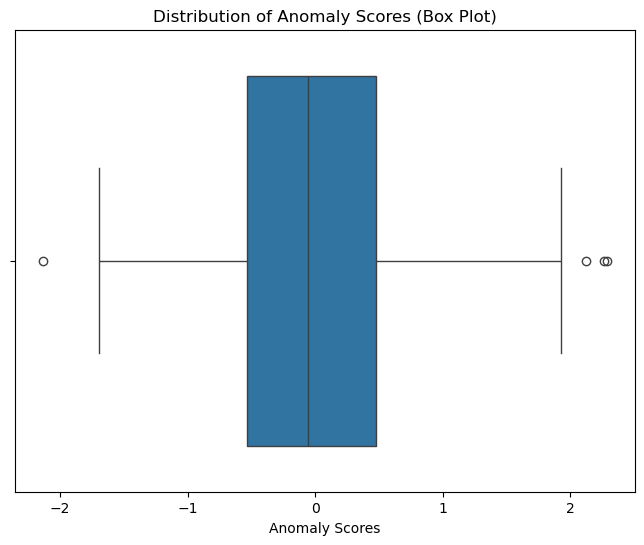

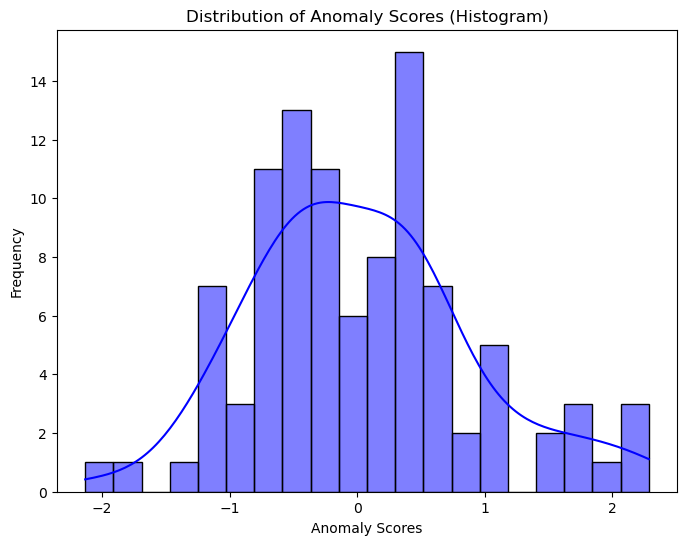

In [10]:
anomaly_scores = np.random.normal(size=100)

plt.figure(figsize=(8, 6))
sns.boxplot(x=anomaly_scores)
plt.title('Distribution of Anomaly Scores (Box Plot)')
plt.xlabel('Anomaly Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(anomaly_scores, kde=True, bins=20, color='blue')
plt.title('Distribution of Anomaly Scores (Histogram)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.show()

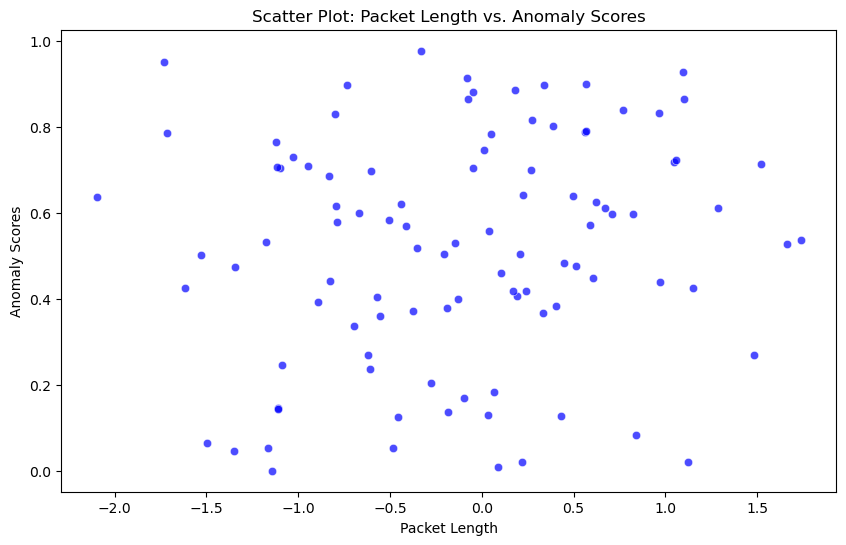

In [11]:
packet_length = np.random.normal(size=100)
anomaly_scores = np.random.uniform(low=0, high=1, size=100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=packet_length, y=anomaly_scores, color='blue', alpha=0.7)
plt.title('Scatter Plot: Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.show()

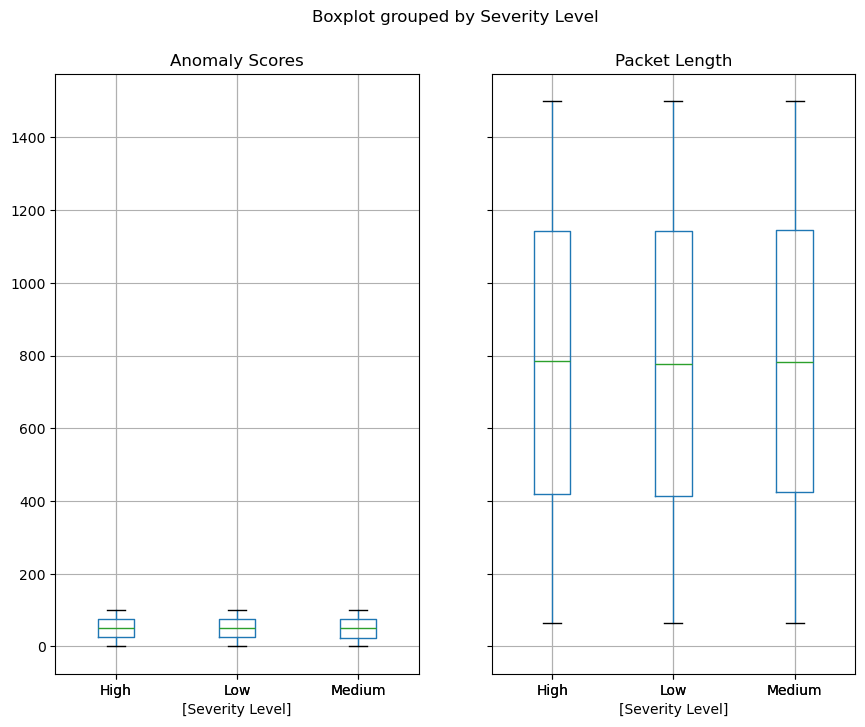

In [12]:
df.boxplot(figsize=(10,8), by='Severity Level')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14920\688974685.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Attack Type", loc="upper right")


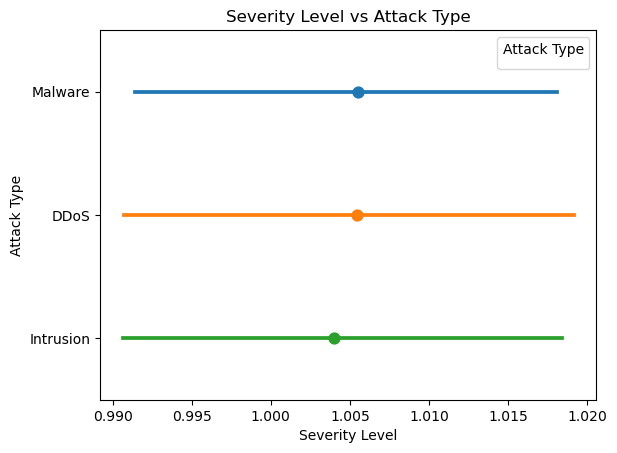

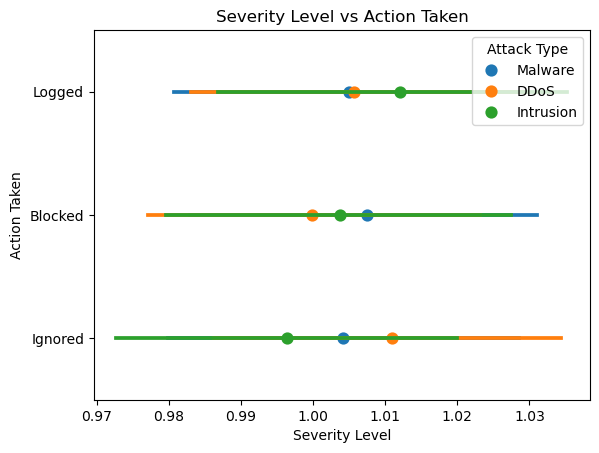

In [13]:
df['Severity Level'] = pd.factorize(df['Severity Level'])[0]

# Point plot for Attack Type
sns.pointplot(data=df, x="Severity Level", y="Attack Type", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Attack Type")
plt.xlabel("Severity Level")
plt.ylabel("Attack Type")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

# Point plot for Action Taken
sns.pointplot(data=df, x="Severity Level", y="Action Taken", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Action Taken")
plt.xlabel("Severity Level")
plt.ylabel("Action Taken")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

In [14]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
df['Anomaly Scores'].unique
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings','Severity Level']

numerical_features = ['Packet Length']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X_train = df [categorical_features + numerical_features]
y_train = df['Anomaly Scores']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
])

In [18]:
X_transformed = pipeline.fit_transform(df)

In [19]:
A = pipeline.fit_transform(X_train, y_train)

In [20]:
A.shape

(40000, 27)

In [21]:
A

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.66929478],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.94353482],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -1.14280809],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.62866049],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.7173672 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.94593844]])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor

In [23]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings','Severity Level']

numerical_features = ['Packet Length']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X= df [categorical_features + numerical_features]
y= df['Anomaly Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor) , ('model', RandomForestRegressor(n_estimators=100))
])

In [24]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings',
                                                   'Severity Level']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length'])])),
                ('model', RandomForestRegressor())])

In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings',
                                                   'Severity Level']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length'])])),
                ('model', RandomForestRegressor())])

In [26]:
pipeline['model'].feature_importances_

array([0.02483105, 0.02445039, 0.02444105, 0.02114113, 0.02105753,
       0.02069268, 0.01571985, 0.02143379, 0.02154704, 0.02146298,
       0.02421709, 0.02416235, 0.02436854, 0.02142967, 0.02126452,
       0.02359625, 0.02478897, 0.02409458, 0.02346088, 0.02331192,
       0.02394851, 0.02078942, 0.02066231, 0.02473831, 0.02453656,
       0.02473657, 0.40911606])

In [27]:
pipeline.feature_names_in_

array(['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
       'Attack Type', 'Attack Signature', 'Action Taken',
       'Network Segment', 'Alerts/Warnings', 'Severity Level',
       'Packet Length'], dtype=object)

In [28]:
from sklearn.model_selection import cross_validate

cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

{'fit_time': array([20.36286211, 21.09010863, 21.2138164 , 21.18781519, 21.55190873]),
 'score_time': array([0.23205662, 0.21933436, 0.25400615, 0.22603011, 0.23540068]),
 'test_score': array([-0.07074869, -0.06408082, -0.07585361, -0.06216103, -0.05676678]),
 'train_score': array([0.85080929, 0.85046596, 0.85108726, 0.84976805, 0.85020837])}

In [29]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings']

numerical_features = ['Packet Length', 'Anomaly Scores']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X= df [categorical_features + numerical_features]
y= df['Severity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor) , ('model', RandomForestClassifier(n_estimators=100))
])

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length',
                                                   'Anomaly Scores'])])),
                ('model', RandomForestClassifier())])

In [31]:
importances=pipeline['model'].feature_importances_
importances

array([0.01378417, 0.01437378, 0.0139506 , 0.01588642, 0.01588877,
       0.01558371, 0.01599883, 0.0166418 , 0.01476975, 0.01513257,
       0.01728809, 0.0171078 , 0.01799246, 0.01567149, 0.0155136 ,
       0.0160676 , 0.0162194 , 0.01486461, 0.0150448 , 0.0151278 ,
       0.01607155, 0.01757254, 0.01772179, 0.31658986, 0.31913622])

In [32]:
ft_names = pipeline['preprocessor'].get_feature_names_out()
ft_names

array(['cat__Protocol_ICMP', 'cat__Protocol_TCP', 'cat__Protocol_UDP',
       'cat__Packet Type_Control', 'cat__Packet Type_Data',
       'cat__Traffic Type_DNS', 'cat__Traffic Type_FTP',
       'cat__Traffic Type_HTTP', 'cat__Malware Indicators_IoC Detected',
       'cat__Malware Indicators_None Detected', 'cat__Attack Type_DDoS',
       'cat__Attack Type_Intrusion', 'cat__Attack Type_Malware',
       'cat__Attack Signature_Known Pattern A',
       'cat__Attack Signature_Known Pattern B',
       'cat__Action Taken_Blocked', 'cat__Action Taken_Ignored',
       'cat__Action Taken_Logged', 'cat__Network Segment_Segment A',
       'cat__Network Segment_Segment B', 'cat__Network Segment_Segment C',
       'cat__Alerts/Warnings_Alert Triggered',
       'cat__Alerts/Warnings_No Alert', 'num__Packet Length',
       'num__Anomaly Scores'], dtype=object)

In [33]:
from sklearn.model_selection import StratifiedKFold

In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy', return_train_score=True)

{'fit_time': array([5.93310189, 6.24781466, 5.21450639, 6.07179189, 5.43756557]),
 'score_time': array([0.21173453, 0.20033813, 0.19443393, 0.21852803, 0.19966316]),
 'test_score': array([0.33569444, 0.34013889, 0.34111111, 0.33736111, 0.33277778]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [36]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

In [37]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
}

In [38]:
results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, return_train_score=True)

In [39]:
results

{'fit_time': array([5.71291447, 5.82734728, 5.83425713, 5.74750495, 6.07931018]),
 'score_time': array([0.23385763, 0.26918125, 0.37498784, 0.22673798, 0.26744914]),
 'test_accuracy': array([0.33055556, 0.34875   , 0.34041667, 0.335     , 0.32569444]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1_micro': array([0.33055556, 0.34875   , 0.34041667, 0.335     , 0.32569444]),
 'train_f1_micro': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.33045984, 0.34869388, 0.34029736, 0.33496027, 0.32565894]),
 'train_f1_macro': array([1., 1., 1., 1., 1.]),
 'test_precision_macro': array([0.33059767, 0.3486979 , 0.34028916, 0.33497988, 0.32567522]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.33054109, 0.34870455, 0.34034144, 0.33496193, 0.32570825]),
 'train_recall_macro': array([1., 1., 1., 1., 1.])}

In [40]:
results['test_f1_macro'].mean()

0.3360140561414542

In [41]:
results['test_f1_micro'].mean()

0.33608333333333335

In [42]:
results['test_accuracy'].mean()

0.33608333333333335

In [43]:
test_pred = pipeline.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
test_res = pd.DataFrame(classification_report(y_test, test_pred, output_dict=True))
test_res

,0,1,2,accuracy,macro avg,weighted avg
precision,0.327314,0.332606,0.344641,0.33475,0.334854,0.334888
recall,0.330046,0.340030,0.334081,0.33475,0.334719,0.334750
f1-score,0.328674,0.336277,0.339279,0.33475,0.334743,0.334776
support,1318.000000,1344.000000,1338.000000,0.33475,4000.000000,4000.000000


In [46]:
test_res.to_csv('test_res.csv')

In [47]:
from sklearn import metrics

scorer_names = metrics.get_scorer_names()
print(scorer_names)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

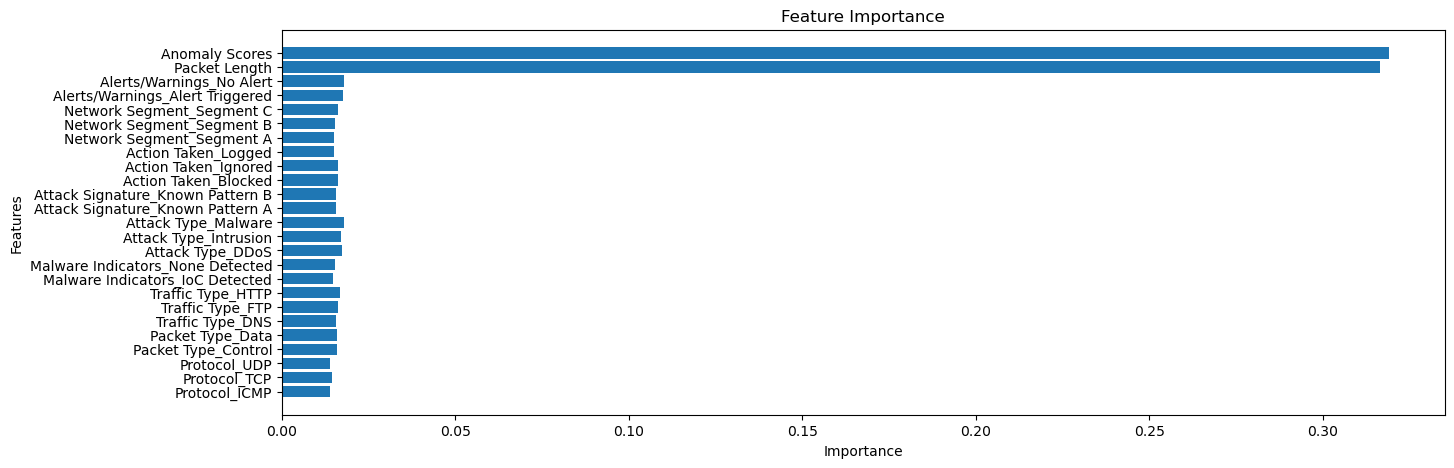

In [48]:
# cleaned_ft_names = [name.replace("num_", "").replace("cat_", "") for name in ft_names]
cleaned_ft_names = [name.replace("cat__", "").replace("num__", "") for name in ft_names]
plt.figure(figsize=(15, 5))
plt.barh(cleaned_ft_names, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

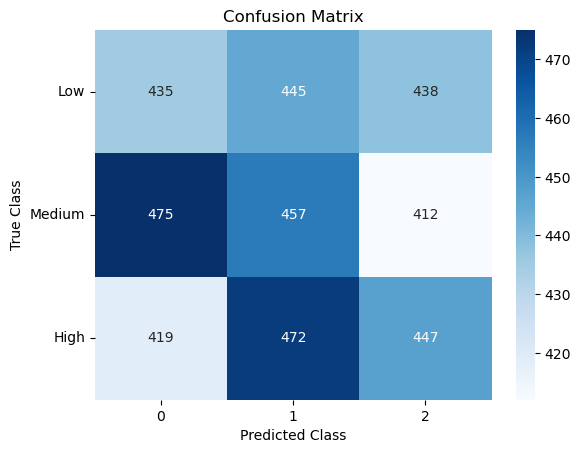

In [50]:
# Assuming y_true and y_pred are your true labels and predictions, respectively
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Customize the y-axis labels and center them
class_labels = ['Low', 'Medium', 'High']
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0, va='center')

# Label the axes
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add a title
plt.title('Confusion Matrix')

# Show the plot
plt.show()